1607094242赵旭


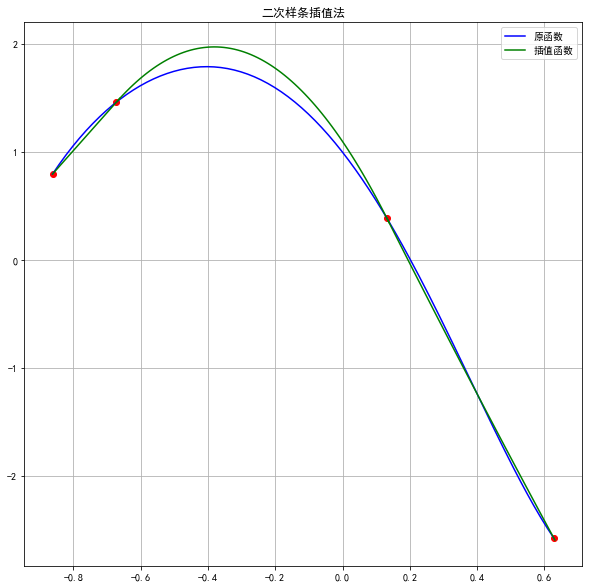

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

def primitivef(x):
    return 2*x**5+3*x**4+x**3-5*x**2-4*x+1
def f(a,b,c,x):
    return a*x**2+b*x+c
#n+1个点有3n个未知数(假设a1也为未知数)
def Quadraticsplineinterpolation(n):
    global xList
    total = n*3
    X = np.zeros((total,total))
    Y = np.zeros((total))
    b = 0
    j = 0 #第几个点 在b==0的时候指向下一个点
    k = 0 #第几个方程 在b==1的时候指到下一个方程
    #i是带入点能得到的方程
    for i in range(2*n):
        yNum = primitivef(xList[j])
        xNum = xList[j]
        weizhi = 3*k #确定a b c的位置
        Y[i] = yNum
        X[i][weizhi] = xNum**2
        X[i][weizhi+1] = xNum
        X[i][weizhi+2] = 1
        if b==0:
            b = 1
            j += 1
        elif b==1:
            b = 0
            k += 1
    k = 0 #第几个方程
    j = 1 #第几个点
    #i是得到导数相等得到的方程
    for i in range(2*n,total-1,1):
        weizhi1 = 3*k
        weizhi2 = 3*(k+1)
        X[i][weizhi1] = 2*xList[j]
        X[i][weizhi1+1] = 1
        X[i][weizhi2] = -2*xList[j]
        X[i][weizhi2+1] = -1
        j += 1
        k += 1
    X[total-1][0] = 1
    canshu = solve(X,Y)
    return canshu
def drawline(canshu,n):
    global xList
    plt.figure(figsize=(10,10))
    line = np.arange(xList[0],xList[n]+0.01,0.01)
    plt.rcParams["font.sans-serif"] = ["SimHei"]
    plt.rcParams['axes.unicode_minus'] = False
    plt.plot(line,primitivef(line),color = 'b',label = '原函数')
    plt.grid()
    for i in range(n):
        x1 = xList[i]
        x2 = xList[i+1]
        line = np.arange(x1,x2+0.01,0.01)
        num = i*3
        a = canshu[num]
        b = canshu[num+1]
        c = canshu[num+2]
        plt.plot(line,f(a,b,c,line),color='g',label = '插值函数')
    plt.legend(['原函数','插值函数'])
    plt.title('二次样条插值法')
    for i in range(n+1):
        plt.scatter(xList[i],primitivef(xList[i]),color = 'r')
global xList
xList = list()
#生成4个随机数
print("1607094242赵旭")
for i in range(4):
    num = np.random.uniform(-2.5, 3)
    xList.append(num)
xList.sort()
n = len(xList)-1 #n为区间个数
canshu = Quadraticsplineinterpolation(n)
drawline(canshu,n)